In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We define each of labels directory:

In [ ]:
import os

# Directory with our Bacterial Leaf Blight pictures
train_bacterial_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Bacterial Leaf Blight')

# Directory with our Brown Spot pictures
train_brown_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Brown Spot')

# Directory with our Leaf Smut pictures
train_leaf_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Leaf Smut')

Now we see what the filenames look like in the `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` directories:

In [ ]:
train_bacterial_names = os.listdir(train_bacterial_dir)
print("File names in Bacterial Leaf Blight directory:")
print(train_bacterial_names[:10])

train_brown_names = os.listdir(train_brown_dir)
print("\nFile names in Brown Spot directory:")
print(train_brown_names[:10])

train_leaf_names = os.listdir(train_leaf_dir)
print("\nFile names in Leaf Smut directory:")
print(train_leaf_names[:10])

File names in Bacterial Leaf Blight directory:
['DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0365.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0382.JPG', 'DSC_0383.JPG', 'DSC_0703.JPG']

File names in Brown Spot directory:
['DSC_0299.JPG', 'DSC_0302.JPG', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0303.JPG', 'DSC_0304.JPG', 'DSC_0305.JPG', 'DSC_0306.JPG', 'DSC_0323.JPG', 'DSC_0325.JPG']

File names in Leaf Smut directory:
['DSC_0508.jpg', 'DSC_0309.JPG', 'DSC_0316.JPG', 'DSC_0327.JPG', 'DSC_0331.JPG', 'DSC_0293.JPG', 'DSC_0310.JPG', 'DSC_0317.JPG', 'DSC_0335.JPG', 'DSC_0322.jpg']


We can also find out the total number of `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` images in the directories:

In [ ]:
print('total Bacterial Leaf Blight images:', len(os.listdir(train_bacterial_dir)))
print('total Brown Spot images:', len(os.listdir(train_brown_dir)))
print('total Leaf Smut images:', len(os.listdir(train_leaf_dir)))

total Bacterial Leaf Blight images: 32
total Brown Spot images: 32
total Leaf Smut images: 32


# **Data Visualization**

Now we take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 3
ncols = 3

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 each disease pictures. We can rerun the cell to see a fresh batch each time:

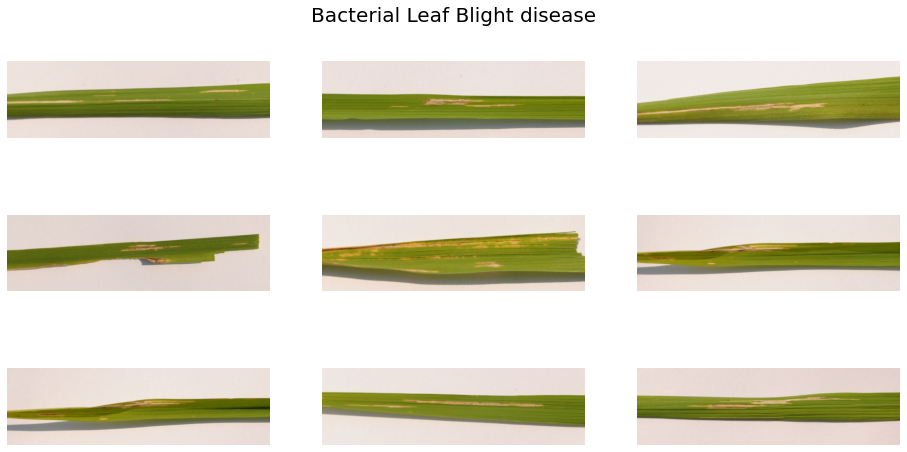

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
                for fname in train_bacterial_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_bacterial_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Bacterial Leaf Blight disease", pad = 40, fontsize = 20)

plt.show()

In [ ]:
pic_index = 0

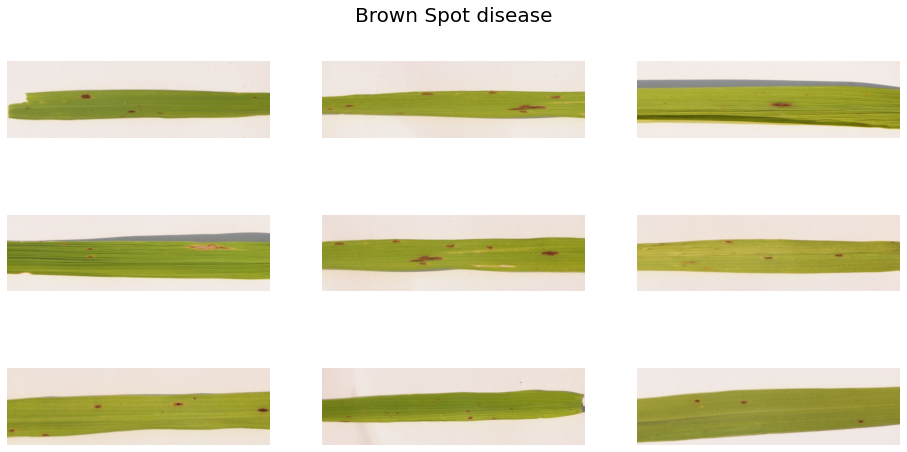

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_brown_pix = [os.path.join(train_brown_dir, fname) 
                for fname in train_brown_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_brown_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Brown Spot disease", pad = 40, fontsize = 20)

plt.show()

In [ ]:
pic_index = 0

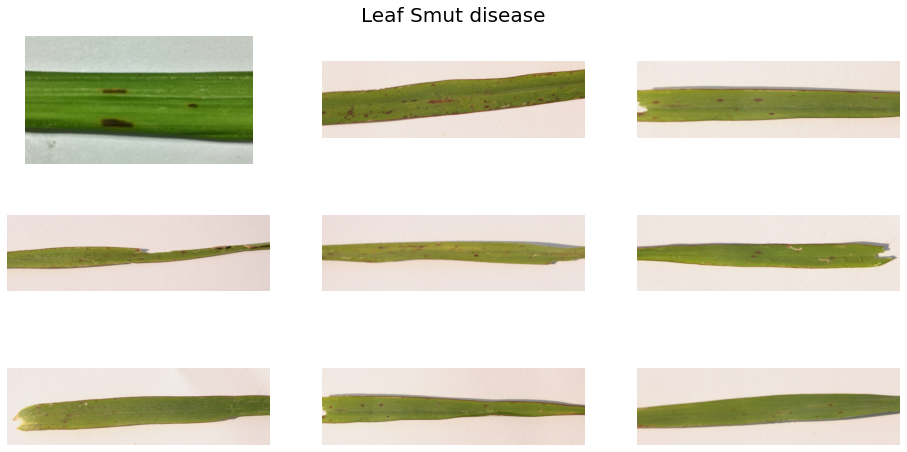

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_leaf_pix = [os.path.join(train_leaf_dir, fname) 
                for fname in train_leaf_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_leaf_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Leaf Smut disease", pad = 40, fontsize = 20)

plt.show()

# **Data Augmentation**

We use ImageDataGenerator in TensorFlow to augment our data.

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train')
validation_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/validation')

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(pixels, pixels),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(pixels, pixels),
        batch_size=8,
        class_mode='categorical')

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:

import tensorflow_hub as hub

print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)

• Using TensorFlow Hub Version:  0.12.0


In [ ]:
do_fine_tuning = False #@param {type:"boolean"}



Load TFHub Module


In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)